## Plots for loop tests for which all subcats have the same number of a single LID

In [1]:
# IMPORTANT:  RUN THIS BLOCK FIRST
# ONLY for loop tests for which all subcats have the same number of a single LID:
%matplotlib inline
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt
def volume_reduction_and_runoff_volume_vs_lid_number(collectionName):
    mGal = 133680.5  # 1 Million gallon in cubic feet
    runs = db[collectionName]
    cursor = runs.find()
    numList = []
    volReductionList = []
    totalSurfaceOutflowList = []
    csoVolList=[]
    noLidRun = cursor[0]
    noLidVolume = noLidRun['volume']
    for run in cursor:
        runParamsZero = run['runParamList'][0] 
        number = runParamsZero['Number']
        numList.append(number)
        volume = run['volume']
        volReduction = noLidVolume-volume
        volReductionList.append(volReduction)
        cso=run['cso_volume']
        csoVolList.append(cso)
        if run['lidDict'] == None:
            totalSurfaceOutflowList.append(None)
            continue
        else:
            totalSurfaceOutflow = 0.0
            runParamList = run['runParamList']
            lidDict = run['lidDict']
            for lidUsage in runParamList:
                lid = lidUsage['LID']
                subcat = lidUsage['Subcat']
                lidNumber = lidUsage['Number']
                #print lidNumber,
                lidArea = lidUsage['Area']  # in square feet
                lidKey = subcat+' '+lid
                surfaceOutflowInches = lidDict[lidKey]['Surface Outflow']
                surfaceOutflow = surfaceOutflowInches*lidNumber*lidArea/12.0  # cubic feet
                totalSurfaceOutflow += surfaceOutflow/mGal  # convert to million Gal/year
                
            #print totalSurfaceOutflow
            totalSurfaceOutflowList.append(totalSurfaceOutflow)


    return(numList, csoVolList, volReductionList, totalSurfaceOutflowList)

### Show the collections that have been generated

In [2]:
from pymongo import MongoClient

#  IMPORTANT:  Set these for each run:
#################################################
# mongoServer = None   # use the local mongodb server installed on your computer
#mongoServer = 'mongodb://server.mcgarity.info:27017/'  # Art's personal server
#mongoServer = 'mongodb://ubuntu:27017/'  # ubuntu Linux virtual machine on Art's Mac
mongoServer = 'mongodb://aws-2.greenphilly.net:27017/'  # aws-2 server for GreenPhilly
database = "jcohen4"
username = "jcohen4"
password = "wingohocking"
authenticationDatabase = "jcohen4"
collection = 'july'
client = MongoClient(mongoServer)
################################################

db = client[database]
db.authenticate(username, password, source=authenticationDatabase)  # pass credentials to database
collectionNames = sorted(db.collection_names())
collectionNames

[u'first_wingo_test',
 u'fourth_wingo_test',
 u'july',
 u'second_wingo_test',
 u'y16m10d11_demonstrate_runswmm_on_aws-2']

### Plot Results from Increasing numbers of Wakefield Raingardens in S1 - S6

Collection(Database(MongoClient(host=['aws-2.greenphilly.net:27017'], document_class=dict, tz_aware=False, connect=True), u'jcohen4'), u'july')
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.11199999999999477, 0.22499999999999432, 0.3359999999999843, 0.4480000000000075, 0.5600000000000023, 0.6730000000000018, 0.7839999999999918, 0.8969999999999914, 1.0079999999999814, 1.120999999999981, 1.233000000000004, 1.3449999999999989, 1.4569999999999936, 1.5670000000000073, 1.6809999999999832, 1.7920000000000016, 1.9029999999999916, 2.016999999999996, 2.127999999999986, 2.2409999999999854, 0.0, 0.11199999999999477, 0.22499999999999432, 0.3359999999999843, 0.4480000000000075, 0.

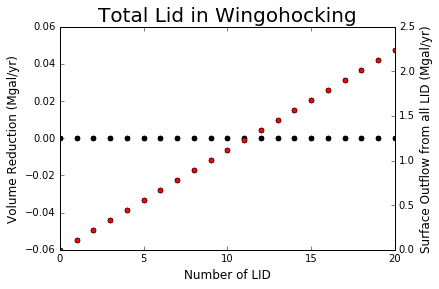

In [3]:
collectionName = 'july'
print db[collectionName]
x = volume_reduction_and_runoff_volume_vs_lid_number(collectionName)
print x
(fig, ax1) = plt.subplots()
ax1.plot(x[0],x[1],'ko',markersize = 5)
ax1.set_xlabel("Number of LID",fontsize=12)
ax1.set_ylabel("Volume Reduction (Mgal/yr)",fontsize=12)
ax2 = ax1.twinx()
ax2.plot(x[0],x[2],'ro',markersize = 5)
ax2.set_ylabel("Surface Outflow from all LID (Mgal/yr)",fontsize=12)
plt.title('Total Lid in Wingohocking',fontsize=20)
